In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os
import random
import shutil

In [ ]:
train_len = glob('/content/drive/My Drive/tomato dataset/TrainingData/*')
len(train_len)

10

In [ ]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=[224,224,3])

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for i in vgg.layers:
  i.trainable = False

In [ ]:
from tensorflow.keras.models import Model,Sequential

<font color = 'red' size = 4>Claculation of the parameters in the VGG16 layers is done in this way:..First layer has 64 filters each of size 3X3X3 as the image is in RGB mode i..e why 3X3X3 then so total number of trainabble parameters for the first Convlayer is : [(64X27)+64],as 64 biases,each filter has one bias...so the total trainabel parameters are : 1792 for the first layer,then comes the second layer,the input image would be of dimennsion 3X3X64 as it was convovled with 64 filters from the 1st Conv layer,now filters for the second Conv layer are : [(3X3X64)X64+64],coz even the second convlayer has used 64 filters so the total trainable parameters are : 36928..so in this fashion the parameters are calulated and also,the parameters are calculated for only the Convolution layers and the Dense layers not for the Maxpool layers!</font>

In [ ]:
x = Flatten()(vgg.output)
output = Dense(len(train_len),activation='softmax')(x)
model = Model(inputs = vgg.input,outputs = output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training = train_datagen.flow_from_directory('/content/drive/My Drive/tomato dataset/TrainingData',
                                             target_size = (224,224),
                                             class_mode = 'categorical',
                                             batch_size = 32)
testing = test_datagen.flow_from_directory('/content/drive/My Drive/tomato dataset/TestingData',
                                           target_size = (224,224),
                                           class_mode = 'categorical',
                                           batch_size = 32)

Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
r = model.fit_generator(
    training,
    steps_per_epoch = len(training),
    epochs = 25,
    validation_data = testing,
    validation_steps = len(testing)
)

Epoch 1/25
32/32 [==============================] - 1097s 34s/step - loss: 1.5596 - accuracy: 0.4950 - val_loss: 0.9967 - val_accuracy: 0.6660
Epoch 2/25
32/32 [==============================] - 19s 604ms/step - loss: 0.8399 - accuracy: 0.7310 - val_loss: 0.9494 - val_accuracy: 0.6520
Epoch 3/25
32/32 [==============================] - 19s 598ms/step - loss: 0.6029 - accuracy: 0.8070 - val_loss: 0.6737 - val_accuracy: 0.7650
Epoch 4/25
32/32 [==============================] - 19s 608ms/step - loss: 0.4621 - accuracy: 0.8630 - val_loss: 0.6496 - val_accuracy: 0.7790
Epoch 5/25
32/32 [==============================] - 19s 592ms/step - loss: 0.4090 - accuracy: 0.8810 - val_loss: 0.5822 - val_accuracy: 0.8040
Epoch 6/25
32/32 [==============================] - 19s 582ms/step - loss: 0.3084 - accuracy: 0.9240 - val_loss: 0.7211 - val_accuracy: 0.7570
Epoch 7/25
32/32 [==============================] - 19s 581ms/step - loss: 0.3072 - accuracy: 0.9150 - val_loss: 0.6766 - val_accuracy: 0.7710

In [ ]:
!pip install mplcyberpunk

In [ ]:
import mplcyberpunk

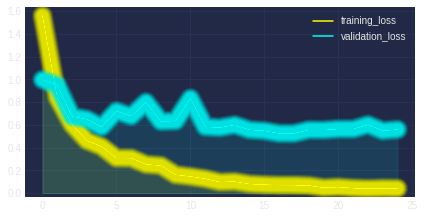

In [ ]:
plt.figure(figsize=(7,3.5))
plt.style.use('cyberpunk')
plt.plot(r.history['loss'],label = 'training_loss',color = 'yellow')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'cyan')
plt.legend()
mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
plt.show()

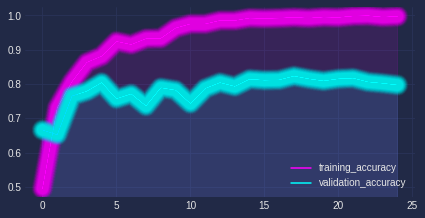

In [ ]:
plt.figure(figsize=(7,3.5))
plt.style.use('cyberpunk')
plt.plot(r.history['accuracy'],label = 'training_accuracy',color = 'magenta')
plt.plot(r.history['val_accuracy'],label = 'validation_accuracy',color = 'cyan')
plt.legend()
mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
plt.show()

In [ ]:
name_list  = os.listdir('/content/drive/My Drive/tomato dataset/TrainingData')
name_list

['Tomato___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot']

In [ ]:
dict_map = {i:j for i,j in enumerate(name_list)}
dict_map

{0: 'Tomato___healthy',
 1: 'Tomato___Tomato_mosaic_virus',
 2: 'Tomato___Septoria_leaf_spot',
 3: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 4: 'Tomato___Spider_mites Two-spotted_spider_mite',
 5: 'Tomato___Leaf_Mold',
 6: 'Tomato___Target_Spot',
 7: 'Tomato___Early_blight',
 8: 'Tomato___Late_blight',
 9: 'Tomato___Bacterial_spot'}

In [ ]:
os.listdir('/content/drive/My Drive/tomato dataset/ValditaionDataset')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions

In [ ]:
valid_images = [x for x in glob('/content/drive/My Drive/tomato dataset/ValditaionDataset/*')]
valid_images

In [ ]:
def verify_image(path):
      load_image = load_img(path,target_size=(224,224))
      image_data = image.img_to_array(load_image)
      label = np.expand_dims(image_data,axis = 0)
      label = model.predict(label)
      #label = preprocess_input(label)
      #new_label = decode_predictions(label)
      #new_label = new_label[0][0]
      #print(label)
      for key,value in dict_map.items():
        if (label[0][key] == 1):
            k = value
      plt.imshow(load_image)
      plt.title(k,fontsize = 20)
      plt.axis('off')
      plt.show()

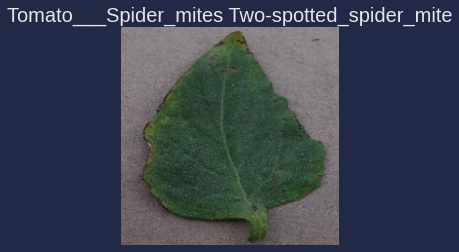

In [ ]:
verify_image(valid_images[1])